# Data Visualization: Ford Go Bike 2018
### by Hussain Balhareth


## Table of Contents
<ul>
<li><a href="#wrangle">I. Preliminary Wrangling</a></li>
<li><a href="#uni">II. Univariate Exploration</a></li>
<li><a href="#bi">III. Bivariate Exploration</a></li>
<li><a href="#mult">IV. Multivariate Exploration</a></li>   
</ul>

In [65]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 20)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("whitegrid", {'axes.grid' : True,'axes.edgecolor':'none'})
import calendar
import time

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

## download the dataset with pandas

In [2]:
# read data with pandas
df = pd.read_csv('data.csv')

<a id='wrangle'></a>

## I. Preliminary Wrangling  

This document explores a dataset including time, stations, and users' attributes for 519,700 bike trips.

### Data overview

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.00,Yerba Buena Center for the Arts (Howard St at ...,37.78,-122.40,114.00,Rhode Island St at 17th St,37.76,-122.40,1035,Subscriber,1988.00,Male,No
1,943,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6.00,The Embarcadero at Sansome St,37.80,-122.40,324.00,Union Square (Powell St at Post St),37.79,-122.41,1673,Customer,1987.00,Male,No
2,18587,2018-02-28 18:20:55.1900,2018-02-28 23:30:42.9250,93.00,4th St at Mission Bay Blvd S,37.77,-122.39,15.00,San Francisco Ferry Building (Harry Bridges Pl...,37.80,-122.39,3498,Customer,1986.00,Female,No
3,18558,2018-02-28 18:20:53.6210,2018-02-28 23:30:12.4500,93.00,4th St at Mission Bay Blvd S,37.77,-122.39,15.00,San Francisco Ferry Building (Harry Bridges Pl...,37.80,-122.39,3129,Customer,1981.00,Male,No
4,885,2018-02-28 23:15:12.8580,2018-02-28 23:29:58.6080,308.00,San Pedro Square,37.34,-121.89,297.00,Locust St at Grant St,37.32,-121.89,1839,Subscriber,1976.00,Female,Yes


In [4]:
df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1863716,887,2018-04-01 00:00:08.1630,2018-04-01 00:14:55.5710,194.00,Lakeshore Ave at Trestle Glen Rd,37.81,-122.24,215.00,34th St at Telegraph Ave,37.82,-122.27,1508,Subscriber,1988.00,Male,Yes
1863717,387,2018-04-01 00:08:06.3670,2018-04-01 00:14:33.9940,30.00,San Francisco Caltrain (Townsend St at 4th St),37.78,-122.40,79.00,7th St at Brannan St,37.77,-122.40,629,Subscriber,1995.00,Female,No
1863718,480,2018-04-01 00:06:21.2810,2018-04-01 00:14:21.4600,44.00,Civic Center/UN Plaza BART Station (Market St ...,37.78,-122.41,21.00,Montgomery St BART Station (Market St at 2nd St),37.79,-122.40,2070,Customer,1984.00,Male,No
1863719,503,2018-04-01 00:04:36.8050,2018-04-01 00:13:00.1020,100.00,Bryant St at 15th St,37.77,-122.41,93.00,4th St at Mission Bay Blvd S,37.77,-122.39,2556,Subscriber,1984.00,Female,No
1863720,192,2018-04-01 00:02:03.8270,2018-04-01 00:05:16.4430,176.00,MacArthur BART Station,37.83,-122.27,215.00,34th St at Telegraph Ave,37.82,-122.27,2144,Customer,1984.00,Male,No


In [5]:
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1377225,381,2018-08-07 19:57:13.0060,2018-08-07 20:03:34.9180,6.00,The Embarcadero at Sansome St,37.80,-122.40,16.00,Steuart St at Market St,37.79,-122.39,2016,Subscriber,1989.00,Male,Yes
1807518,214,2018-04-14 17:38:04.7090,2018-04-14 17:41:38.8570,62.00,Victoria Manalo Draves Park,37.78,-122.41,45.00,5th St at Howard St,37.78,-122.41,3288,Subscriber,1983.00,Male,No
524430,703,2018-06-16 10:38:40.1160,2018-06-16 10:50:23.9240,85.00,Church St at Duboce Ave,37.77,-122.43,121.00,Mission Playground,37.76,-122.42,2854,Subscriber,1984.00,Female,No
788928,178,2018-05-02 21:28:34.3180,2018-05-02 21:31:32.3360,88.00,11th St at Bryant St,37.77,-122.41,99.00,Folsom St at 15th St,37.77,-122.42,3418,Subscriber,1992.00,Male,No
1303845,214,2018-08-20 06:41:46.0640,2018-08-20 06:45:20.6840,21.00,Montgomery St BART Station (Market St at 2nd St),37.79,-122.40,15.00,San Francisco Ferry Building (Harry Bridges Pl...,37.80,-122.39,1112,Subscriber,1986.00,Male,No


In [6]:
# high-level overview of data shape and composition
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  member_birth_year        float64
 14  member_gender            object 
 15  bike_share_for_all_trip  object 
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


### Data Cleaning

#### Dataset Structure 

* What is the structure of your dataset?

> Initially, there are 1,863,721 bike trips in the dataset with 16 features in 2 main data types, string and numeric.

* What is/are the main feature(s) of interest in your dataset?

> User behavior time based (whether member or casual, young,midage or olders). The main variable is the duration and its variation duration different time of day, day of week, and month of year. The data is still needs to be wrangled and cleaned before it's ready for analysis.

* What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The raw dataset has to be wrangled first to add more variables of interest to our research such as time of day, weekday, month for both start and end periods, duration in minutes, age groups, etc.

In [7]:
# drop all rows with null location values
rows0 = df.shape[0]
df.dropna(inplace=True)
rows1 = df.shape[0]
print(f'{rows0-rows1} rows was dropped')

122165 rows was dropped


In [8]:
# drop rows where start_time > end_time
rows0 = df.shape[0]
index = df[df['start_time']> df['end_time']].index
df.drop(index=index, inplace = True)
df[df['start_time']> df['end_time']]
rows1 = df.shape[0]
print(f'{rows0-rows1} rows was dropped')

6 rows was dropped


In [9]:
# drop all entries where member_gender is 'Other' as they constitutes only less than 2% (1.55%) of the data.
rows0 = df.shape[0]
df = df[df['member_gender'] != 'Other']
rows1 = df.shape[0]
print(f'{rows0-rows1} rows was dropped')

27001 rows was dropped


As per [wikipedia.org](https://en.wikipedia.org/wiki/Module:Location_map/data/San_Francisco_Bay_Area), all data are within San Francisco Bay Area boundries.

In [10]:
# drop location columns, e.g. latitude and longitude
# start_station_id and end_station_id are already unique IDs
cols0 = df.shape[1]
cols = ['start_station_name', 'start_station_latitude', 'start_station_longitude', 
        'end_station_name', 'end_station_latitude', 'end_station_longitude']
df.drop(columns=cols, inplace=True)
cols1 = df.shape[1]
print(f'{cols0-cols1} columns was dropped')

6 columns was dropped


In [11]:
# add age column
# drop member_birth_year column
df['age'] = 2018 - df['member_birth_year']
df.drop(columns='member_birth_year', inplace=True)

In [12]:
# add age_group column
age_group = lambda x:\
"15-19" if 15<=x<=19 else\
"20-24" if 20<=x<=24 else\
"25-29" if 25<=x<=29 else\
"30-34" if 30<=x<=34 else\
"35-39" if 35<=x<=39 else\
"40-44" if 40<=x<=44 else\
"45-49" if 45<=x<=49 else\
"50-54" if 50<=x<=54 else\
"55-59" if 55<=x<=59 else\
"60-64" if 60<=x<=64 else\
"65-69" if 65<=x<=69 else\
"70-74" if 70<=x<=74 else\
"75-79" if 75<=x<=79 else\
"80-84" if 80<=x<=84 else\
"85-89" if 85<=x<=89 else\
"90-94" if 90<=x<=94 else\
"95-99" if 95<=x<=99 else\
"100+"
df['age_group'] = df['age'].apply(age_group)

Age Group Codelist
Source: [WHO](https://apps.who.int/gho/data/node.metadata.AGEGROUP?lang=en)

In [13]:
# set data types
df['start_station_id'] = df['start_station_id'].astype(int).astype(str)
df['end_station_id'] = df['end_station_id'].astype(int).astype(str)
df['bike_id'] = df['bike_id'].astype(str)
df['duration_sec'] = df['duration_sec'].astype('uint16')
df['user_type'] = df['user_type'].astype('category')
df['member_gender'] = df['member_gender'].astype('category')
df['bike_share_for_all_trip'] = df['bike_share_for_all_trip'].astype('category')
df['start_time'] = df['start_time'].astype('datetime64')
df['end_time'] = df['end_time'].astype('datetime64')
df['age'] = df['age'].astype('uint16')

In [14]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1714549 entries, 0 to 1863720
Data columns (total 11 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1714549 non-null  uint16        
 1   start_time               1714549 non-null  datetime64[ns]
 2   end_time                 1714549 non-null  datetime64[ns]
 3   start_station_id         1714549 non-null  object        
 4   end_station_id           1714549 non-null  object        
 5   bike_id                  1714549 non-null  object        
 6   user_type                1714549 non-null  category      
 7   member_gender            1714549 non-null  category      
 8   bike_share_for_all_trip  1714549 non-null  category      
 9   age                      1714549 non-null  uint16        
 10  age_group                1714549 non-null  object        
dtypes: category(3), datetime64[ns](2), object(4), uint16(2)
memory 

In [15]:
# Add hours, weekdays, and months columns

# hour 

df['start_hour'] = df["start_time"].apply(lambda time: time.hour)
df['end_hour'] = df["end_time"].apply(lambda time: time.hour)

# weekdays
df['start_day'] = df["start_time"].dt.day_name()
df['end_day'] = df["end_time"].dt.day_name()

# months
df['start_month'] = df["start_time"].dt.month_name()
df['end_month'] = df["end_time"].dt.month_name()

# map to abbrev
dict_day = {'Monday':'Mon', 'Tuesday':'Tue', 'Wednesday':'Wed', 'Thursday':'Thu', 
            'Friday':'Fri', 'Saturday':'Sat', 'Sunday':'Sun'}
df['start_day'] = df['start_day'].map(dict_day)
df['end_day'] = df['end_day'].map(dict_day)

dict_mon = {'January':'Jan', 'February':'Feb', 'March':'Mar', 'April':'Apr', 'May':'May' ,'June':'Jun',
            'July':'Jul','August':'Aug','September':'Sep','October':'Oct','November':'Nov','December':'Dec'}
df['start_month'] = df['start_month'].map(dict_mon)
df['end_month'] = df['end_month'].map(dict_mon)

In [16]:
# add minutes duration column

# seconds --> minutes
df['duration_min'] = df['duration_sec'].apply(lambda x: x/60)

# reduce size: float64 --> float32
df['duration_min'] = pd.to_numeric(df['duration_min'], downcast='float')

In [17]:
# drop duration_sec
cols0 = df.shape[1]
df.drop(columns='duration_sec', inplace=True)
cols1 = df.shape[1]
print(f'{cols0-cols1} columns was dropped')

1 columns was dropped


In [18]:
# set data types
df.start_hour = df.start_hour.astype(str)
df.end_hour = df.end_hour.astype(str)

In [19]:
# set data types

# create an ordinal categorical time variables
age_group = ["15-19", "20-24", "25-29", "30-34", "35-39", "40-44", 
             "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", 
             "75-79", "80-84", "85-89", "90-94", "95-99", "100+"]
hours = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
         '10', '11', '12', '13', '14', '15', '16', '17', 
         '18', '19', '20', '21', '22', '23']
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul','Aug','Sep','Oct','Nov','Dec']

ordinal_var_dict = {'age_group':age_group,
                    'start_hour' : hours,
                    'end_hour' : hours,
                    'start_day': weekdays,
                    'end_day': weekdays,
                    'start_month': months,
                    'end_month': months}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [20]:
# re-arrange headers

cols0 = df.shape[1]
df = df[[
        # bike details
         'bike_id', 
        # user details
         'user_type', 'member_gender', 'age','age_group',
        # duration
         'duration_min',
        # start time
         'start_time', 'start_hour', 'start_day', 'start_month',
        # end time
         'end_time', 'end_hour', 'end_day', 'end_month', 
        # start location
         'start_station_id',
        # end location
         'end_station_id']]
cols1 = df.shape[1]
print(f'{cols0-cols1} columns was dropped')
df.head()

1 columns was dropped


,bike_id,user_type,member_gender,age,age_group,duration_min,start_time,start_hour,start_day,start_month,end_time,end_hour,end_day,end_month,start_station_id,end_station_id
0,1035,Subscriber,Male,30,30-34,9.97,2018-02-28 23:59:47.097,23,Wed,Feb,2018-03-01 00:09:45.187,0,Thu,Mar,284,114
1,1673,Customer,Male,31,30-34,15.72,2018-02-28 23:21:16.495,23,Wed,Feb,2018-02-28 23:36:59.974,23,Wed,Feb,6,324
2,3498,Customer,Female,32,30-34,309.78,2018-02-28 18:20:55.190,18,Wed,Feb,2018-02-28 23:30:42.925,23,Wed,Feb,93,15
3,3129,Customer,Male,37,35-39,309.30,2018-02-28 18:20:53.621,18,Wed,Feb,2018-02-28 23:30:12.450,23,Wed,Feb,93,15
4,1839,Subscriber,Female,42,40-44,14.75,2018-02-28 23:15:12.858,23,Wed,Feb,2018-02-28 23:29:58.608,23,Wed,Feb,308,297


In [21]:
df.describe()

,age,duration_min
count,1714549.00,1714549.00
mean,34.92,12.61
std,10.42,26.40
min,18.00,0.82
25%,27.00,5.73
50%,33.00,9.03
75%,40.00,13.97
max,137.00,1092.17


<a id='uni'></a>

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1714549 entries, 0 to 1863720
Data columns (total 16 columns):
 #   Column            Dtype         
---  ------            -----         
 0   bike_id           object        
 1   user_type         category      
 2   member_gender     category      
 3   age               uint16        
 4   age_group         category      
 5   duration_min      float32       
 6   start_time        datetime64[ns]
 7   start_hour        category      
 8   start_day         category      
 9   start_month       category      
 10  end_time          datetime64[ns]
 11  end_hour          category      
 12  end_day           category      
 13  end_month         category      
 14  start_station_id  object        
 15  end_station_id    object        
dtypes: category(9), datetime64[ns](2), float32(1), object(3), uint16(1)
memory usage: 103.0+ MB


In [23]:
# create DataFrames by dtype

# string
df_str = df.select_dtypes(include= object)
print('df_str =',list(df_str.columns))

# numeric
df_num = df.select_dtypes(include= ['uint16','float32'])
print('df_num =',list(df_num.columns))

# datetime
df_time = df.select_dtypes(include= 'datetime64')
print('df_time =',list(df_time.columns))

# category
df_cat = df.select_dtypes(include= 'category')
print('df_cat =',list(df_cat.columns))

df_str = ['bike_id', 'start_station_id', 'end_station_id']
df_num = ['age', 'duration_min']
df_time = ['start_time', 'end_time']
df_cat = ['user_type', 'member_gender', 'age_group', 'start_hour', 'start_day', 'start_month', 'end_hour', 'end_day', 'end_month']


In [64]:
# export data to new csv
df.to_csv('data_clean.csv',index=False)

_______________

## II. Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Count/Percentage by User type/gender

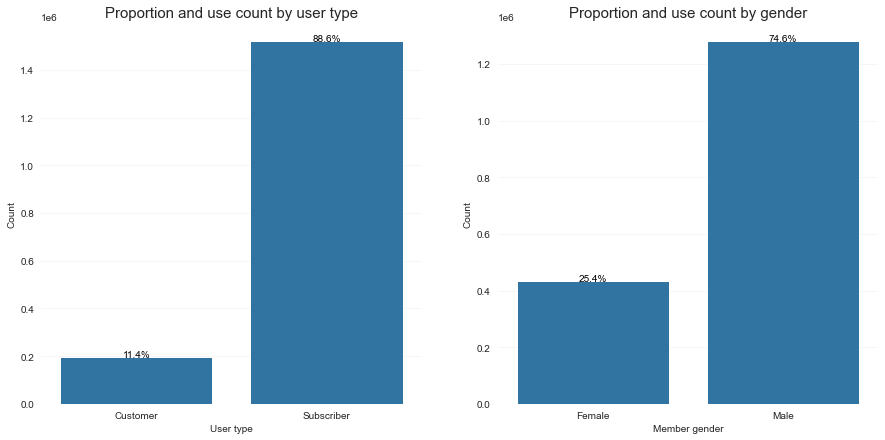

In [26]:
# create a figure and set size

plt.figure(figsize=(15,7))

# ---------------------------------------------------
plt.subplot(121)
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'user_type', color = base_color)

# add annotations
n_points = df.shape[0]
cat_counts = df['user_type'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black')
    
plt.grid(axis='y', alpha=0.2)
plt.xlabel('User type')
plt.ylabel('Count')
plt.title('Proportion and use count by user type', size=15);
# ------------------------------------------------------------- 
plt.subplot(122)
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'member_gender', color = base_color)

# add annotations
n_points = df.shape[0]
cat_counts = df['member_gender'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black')
    
plt.grid(axis='y', alpha=0.2)
plt.xlabel('Member gender')
plt.ylabel('Count')
plt.title('Proportion and use count by gender', size=15);

In [27]:
df[['bike_id','user_type']].groupby(by='user_type').count()

,bike_id
user_type,
Customer,195134
Subscriber,1519415


In [28]:
df[['bike_id','member_gender']].groupby(by='member_gender').count()

,bike_id
member_gender,
Female,435010
Male,1279539


#### Observation:
Here I observe that more than 88% of users are subscribers and more than 73% are male users.

_______________

### Count/Percentage by Time of day

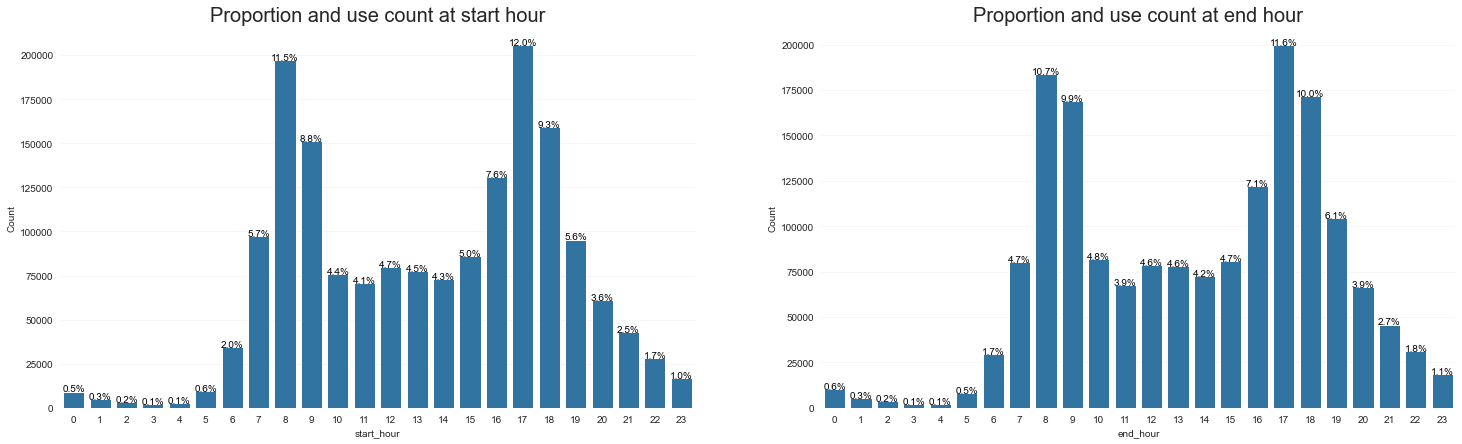

In [29]:
# create the plot

plt.figure(figsize=(25,7))

plt.subplot(121)
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'start_hour', color = base_color, order=hours)

# add annotations
n_points = df.shape[0]
cat_counts = df['start_hour'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black')
    
plt.grid(axis='y', alpha=0.2)
plt.xlabel('start_hour')
plt.ylabel('Count')
plt.title('Proportion and use count at start hour', size=20);
#---------------------------------------------------------------------------
plt.subplot(122)
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'end_hour', color = base_color, order=hours)

# add annotations
n_points = df.shape[0]
cat_counts = df['end_hour'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black')
    
plt.grid(axis='y', alpha=0.2)
plt.xlabel('end_hour')
plt.ylabel('Count')
plt.title('Proportion and use count at end hour', size=20);

#### Observation:
Here I observe than the peak time of day for both round trips is at 8-9AM and 5-6PM which look like work-related to business hours starting and ending periods.

_______________

### Count/Percentage by Age group

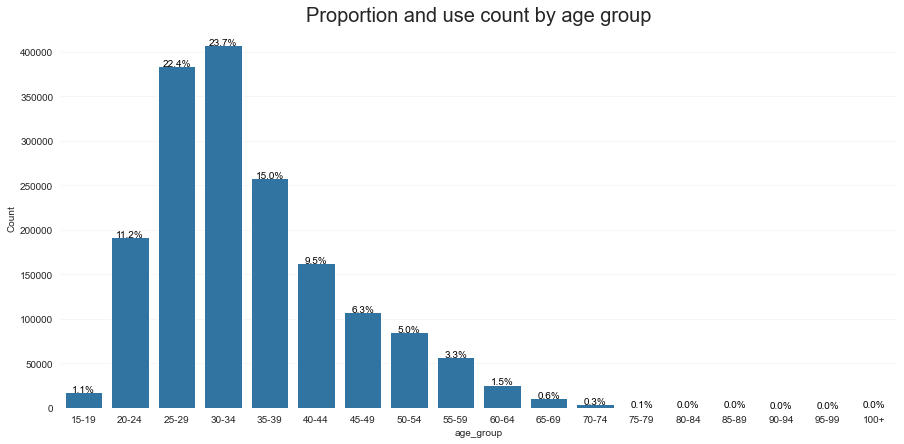

In [30]:
# create the plot

plt.figure(figsize=(15,7))

base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'age_group', color = base_color, order=age_group)

# add annotations
n_points = df.shape[0]
cat_counts = df['age_group'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black')
    
plt.grid(axis='y', alpha=0.2)
plt.xlabel('age_group')
plt.ylabel('Count')
plt.title('Proportion and use count by age group', size=20);

#### Observation:
Here I observe that the group of majority use is '30-34' followed by '25-29' 

_______________

### Count/Percentage by Weekday

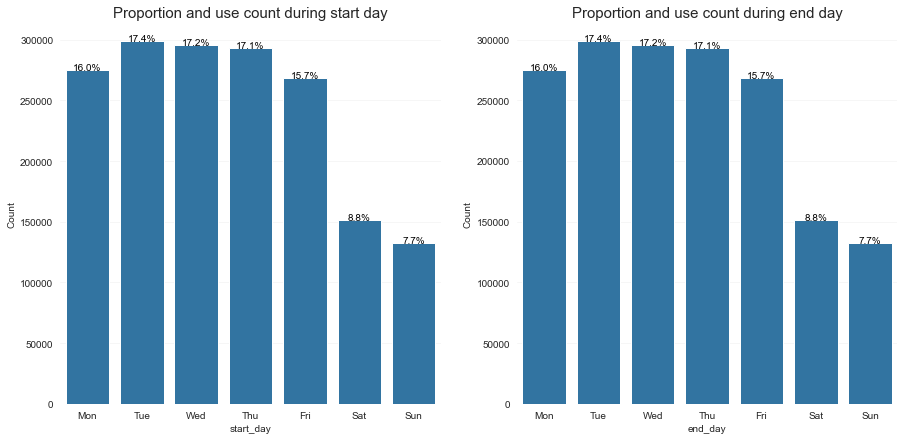

In [31]:
# create the plot

plt.figure(figsize=(15,7))

plt.subplot(121)
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'start_day', color = base_color)

# add annotations
n_points = df.shape[0]
cat_counts = df['start_day'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black')
    
plt.grid(axis='y', alpha=0.2)
plt.xlabel('start_day')
plt.ylabel('Count')
plt.title('Proportion and use count during start day', size=15);
#---------------------------------------------------------------------------
plt.subplot(122)
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'end_day', color = base_color)

# add annotations
n_points = df.shape[0]
cat_counts = df['end_day'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black')
    
plt.grid(axis='y', alpha=0.2)
plt.xlabel('end_day')
plt.ylabel('Count')
plt.title('Proportion and use count during end day', size=15);

#### Observation:
Here I observe that the midweek has the largest proportion of use amongt the other weekdays, namely, Tuesdays, Wednesdays and Thursdays.

_______________

### Count/Percentage by Month

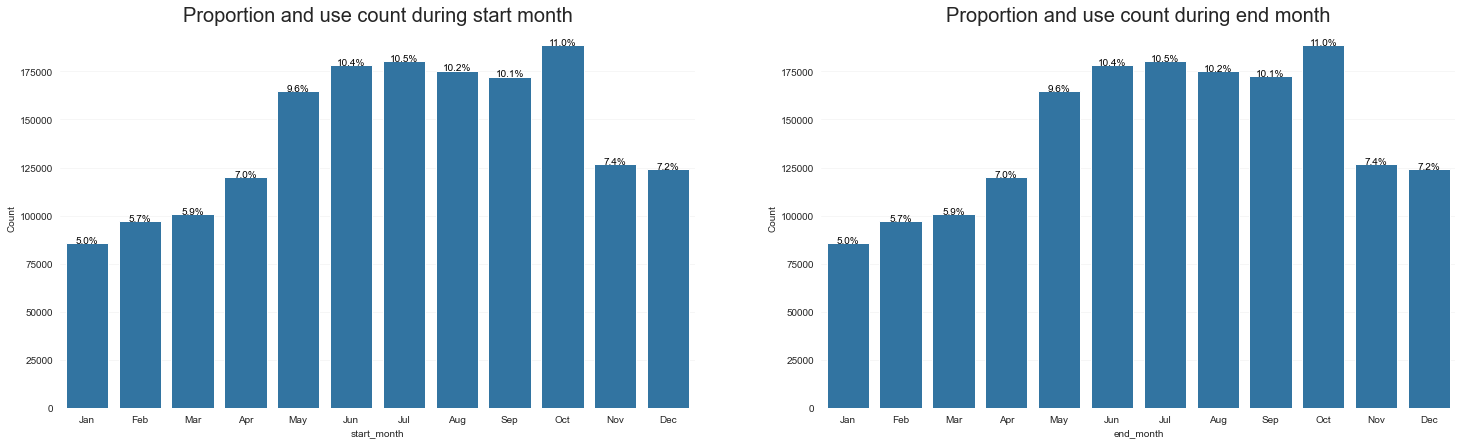

In [32]:
# create the plot

plt.figure(figsize=(25,7))

plt.subplot(121)
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'start_month', color = base_color)

# add annotations
n_points = df.shape[0]
cat_counts = df['start_month'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black')
    
plt.grid(axis='y', alpha=0.2)
plt.xlabel('start_month')
plt.ylabel('Count')
plt.title('Proportion and use count during start month', size=20);
#---------------------------------------------------------------------------
plt.subplot(122)
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'end_month', color = base_color)

# add annotations
n_points = df.shape[0]
cat_counts = df['end_month'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black')
    
plt.grid(axis='y', alpha=0.2)
plt.xlabel('end_month')
plt.ylabel('Count')
plt.title('Proportion and use count during end month', size=20);

#### Observation:
Here I observe a gradual increase in the proportion of use along the year peeking on October and declining towards year end.

_______________

### Use count by Station ID

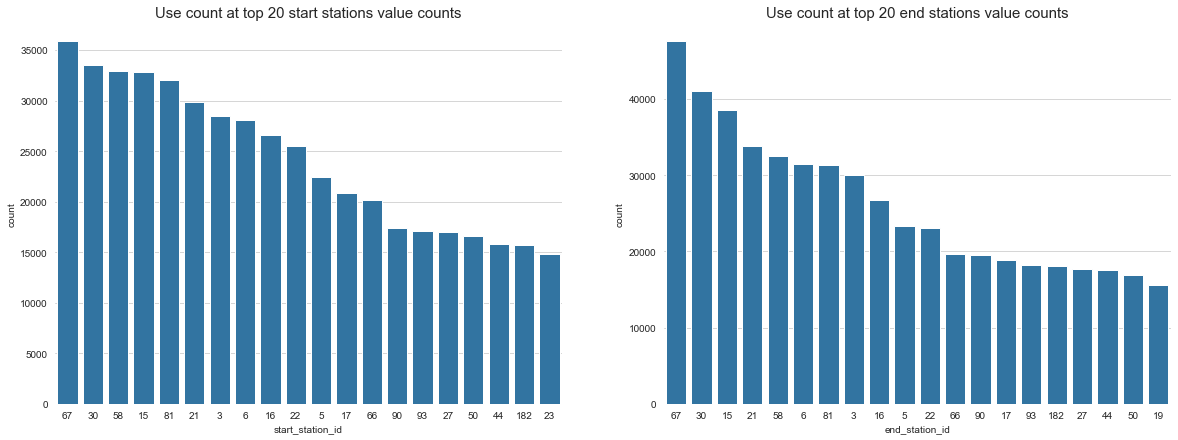

In [33]:
# plot top 20 stations by value counts for start and end trips

str_stn_20 = df[df['start_station_id']\
                   .isin(df['start_station_id']\
                   .value_counts()[df['start_station_id']\
                   .value_counts() >= df['start_station_id']\
                   .value_counts()[19]]\
                   .index)]

end_stn_20 = df[df['end_station_id']\
                   .isin(df['end_station_id']\
                   .value_counts()[df['end_station_id']\
                   .value_counts() >= df['end_station_id']\
                   .value_counts()[19]]\
                   .index)]

# start stations
plt.figure(figsize=(20,7))

plt.subplot(121)
base_color = sb.color_palette()[0]
cat_order = str_stn_20['start_station_id'].value_counts().index
sb.countplot(data = str_stn_20, x = 'start_station_id', color = base_color, order=cat_order)
plt.title('Use count at top 20 start stations value counts',size=15);

# end stations
plt.subplot(122)
base_color = sb.color_palette()[0]
cat_order = end_stn_20['end_station_id'].value_counts().index
sb.countplot(data = end_stn_20, x = 'end_station_id', color = base_color, order=cat_order)
plt.title('Use count at top 20 end stations value counts',size=15);

plt.show()

#### Observation:
Here I observe that stations 67, 30, 58, 15, and 21 are amongst the most frequently used stations.

_______________

### Distribution of Duration of use

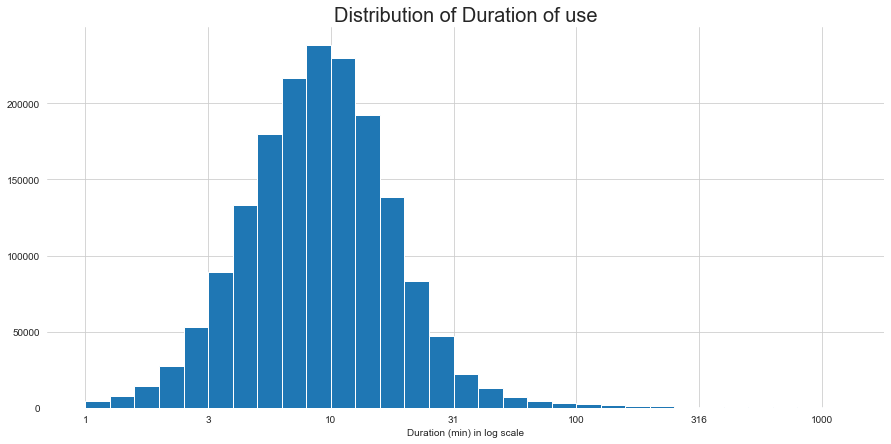

In [34]:
plt.figure(figsize=(15,7))
data = df.duration_min
log_data = np.log10(data) # direct data transform
log_bin_edges = np.arange(0, log_data.max()+0.1, 0.1)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('Duration (min) in log scale')
tick_locs = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
labels = []
for i in tick_locs:
    labels.append(int(10**i))
plt.xticks(tick_locs, labels)
plt.title('Distribution of Duration of use', size=20);

#### Observation:
Here I observe that most of the distribution of duration is between 3 - 30 minutes with a percentage of +90%.

In [35]:
df[(df['duration_min']>=3)&(df['duration_min']<=30)].shape[0]/df.shape[0]*100

90.73552286927932

_______________

_______________

<a id='bi'></a>

## III. Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Duration Statistics per time of day

In [36]:
df[['duration_min']].describe(percentiles=[.25,.75,.98])

,duration_min
count,1714549.00
mean,12.61
std,26.40
min,0.82
25%,5.73
50%,9.03
75%,13.97
98%,41.38
max,1092.17


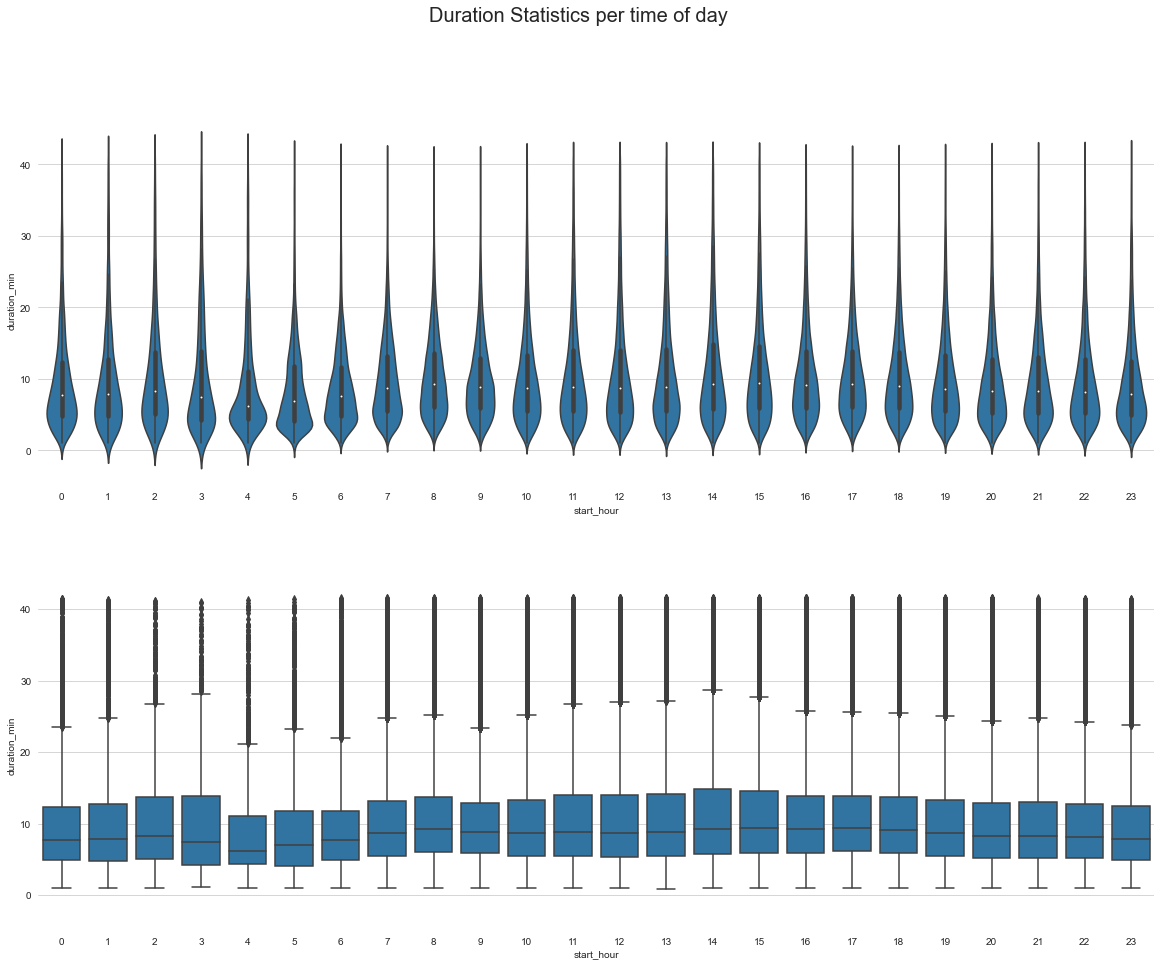

In [37]:
# Here to minimize the data noise in the visualization, I decided to use percentile 98% 
# as the upper peak to minimize the outliers and hence was limited by 41.5 minutes peak on duration.

plt.figure(figsize = [20, 15])
base_color = sb.color_palette()[0]
plt.suptitle('Duration Statistics per time of day', size=20)
# left plot: violin plot
plt.subplot(211)
ax1 = sb.violinplot(data = df[df['duration_min']<= 41.5], 
                    x = 'start_hour', y = 'duration_min', 
                    color = base_color)

# right plot: box plot
plt.subplot(212)
sb.boxplot(data = df[df['duration_min']<= 41.5], 
           x = 'start_hour', y = 'duration_min', 
           color = base_color)
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot

#### Observation:
Here I observe IQR range in hourly base lies between 4 minutes at 5AM to 16 minutes at 3AM and 14PM which represents 50% of the duration data range.

_______________

### Mean duration by user type/gender

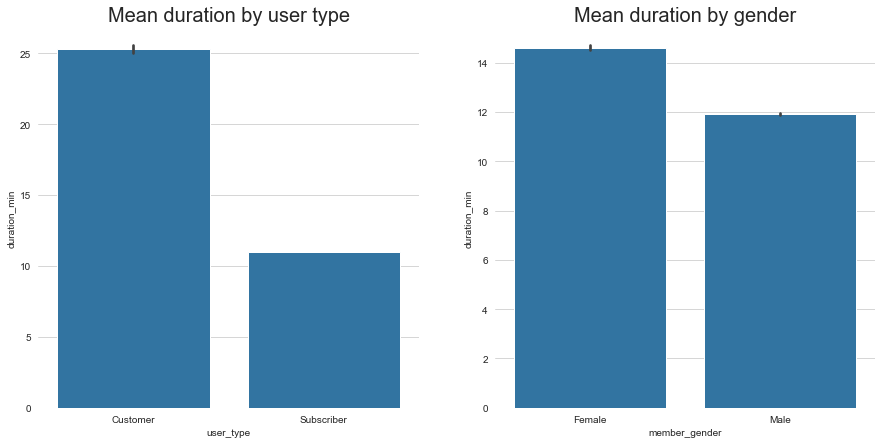

In [38]:
plt.figure(figsize=(15,7))

# mean duration (min) by user type: member vs. casual
plt.subplot(121)
base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'user_type', y = 'duration_min', color = base_color)
plt.title('Mean duration by user type',size = 20);

# mean duration (min) by gender: male vs. female
plt.subplot(122)
base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'member_gender', y = 'duration_min', color = base_color)
plt.title('Mean duration by gender',size = 20);

In [39]:
df[['user_type', 'duration_min']].groupby(by='user_type').mean()

,duration_min
user_type,
Customer,25.29
Subscriber,10.98


In [40]:
df[['member_gender', 'duration_min']].groupby(by='member_gender').mean()

,duration_min
member_gender,
Female,14.61
Male,11.93


#### Observation:
* Here I observe that the mean duration of use by user type is different than the count perspective where the casual customer is >25 minutes while the subscriber is 11 minutes on average.
* Also, I observe that females spent the most on average with 14.6 minutes.

_______________

### Mean age by user type/gender

In [41]:
df[['user_type', 'age']].groupby(by='user_type').mean()

,age
user_type,
Customer,32.91
Subscriber,35.18


In [42]:
df[['member_gender', 'age']].groupby(by='member_gender').mean()

,age
member_gender,
Female,33.76
Male,35.31


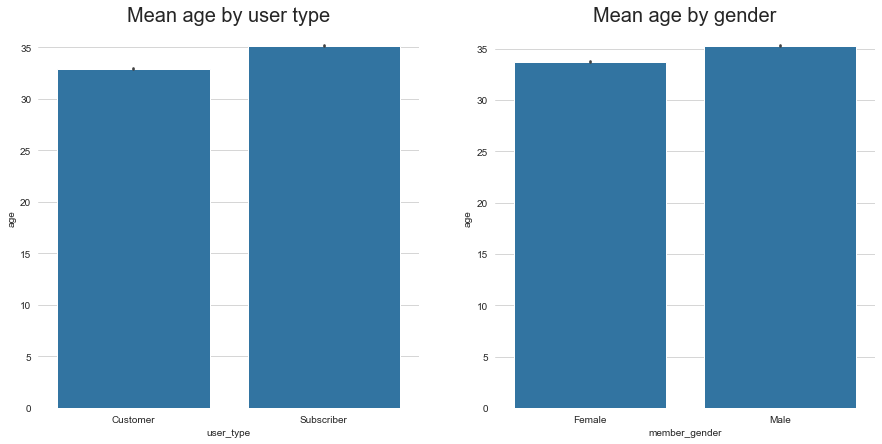

In [43]:
plt.figure(figsize=(15,7))

# mean age (years) by user type: member vs. casual
plt.subplot(121)
base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'user_type', y = 'age', color = base_color)
plt.title('Mean age by user type', size=20);

# mean age (years)  by gender: male vs. female
plt.subplot(122)
base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'member_gender', y = 'age', color = base_color)
plt.title('Mean age by gender', size=20);

#### Observation:
Here I observe that the mean age of most of the users whether by type or gender is between 33 and 36 yrs.

_______________

### Duration distribution by time of day

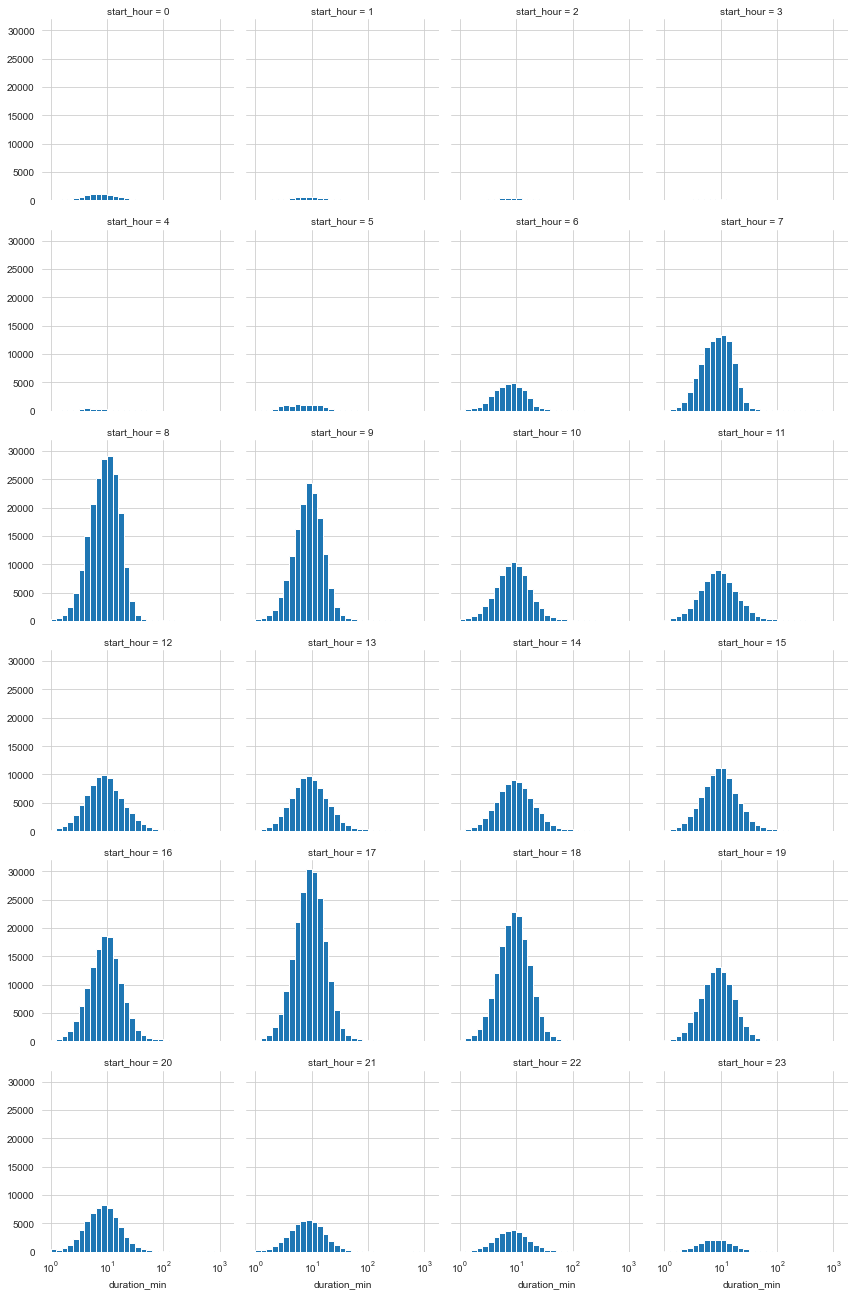

In [44]:
g = sb.FacetGrid(data = df, col = 'start_hour', col_wrap=4)
bins = 10** log_bin_edges
g.map(plt.hist, "duration_min", bins = bins)
plt.xscale('log');

#### Observation:
Here we again observe the distribution of duration by with another dimension which is the start hour where we notice the peaks at 12PM and 21PM. So this graph mixes two univariate graphs and gives more insight on the critical business hours to focus on as duration translates to income.

_______________

### Duration distribution by weekday

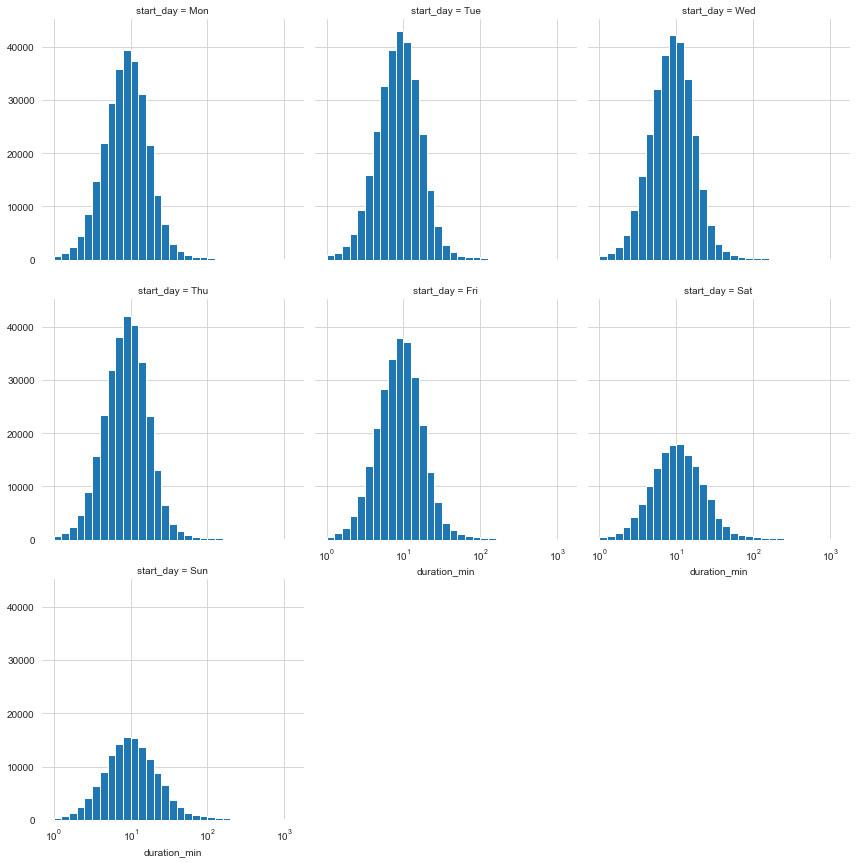

In [45]:
g = sb.FacetGrid(data = df, col = 'start_day', col_wrap=3, height=4, aspect=1)
bins = 10** log_bin_edges
g.map(plt.hist, "duration_min", bins = bins)
plt.xscale('log');

#### Observation:
Likewise, I observe that distribution of duration but here by start day so we might be interest more in midweek, e.g. Tuesdays, Wednesdays and Thursdays.

_______________

### Mean duration vs. Age group

Text(0.5, 1.0, 'Age group vs. mean duration of use')

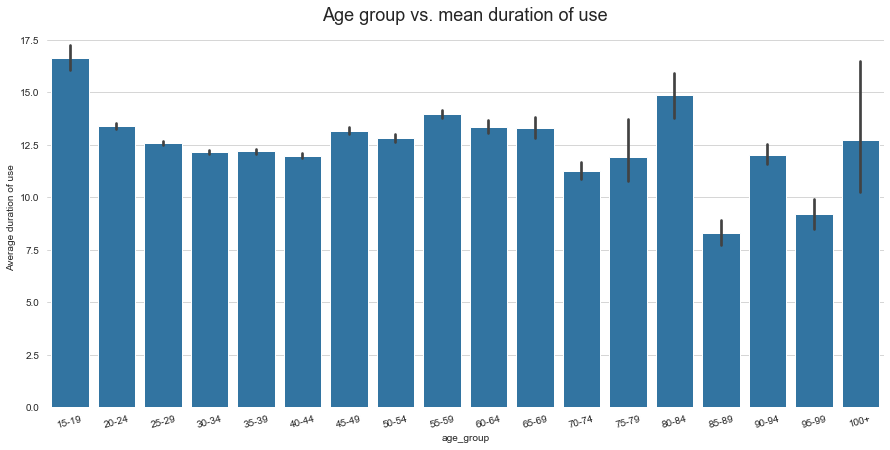

In [70]:
plt.figure(figsize=(15,7))

base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'age_group', y = 'duration_min', color = base_color)
plt.xticks(rotation = 15)
plt.ylabel('Average duration of use')
plt.title('Age group vs. mean duration of use', size = 18)

plt.show()

In [69]:
df[['age_group','duration_min']].groupby(by='age_group').mean()

,duration_min
age_group,
15-19,16.65
20-24,13.39
25-29,12.60
30-34,12.16
35-39,12.19
40-44,11.97
45-49,13.16
50-54,12.82
55-59,13.98


#### Observation:
Here we observe a different story compared to age groups by count '15-19' is the dominant age group in terms of average duration followed by '80-84' age group with '85-89' being the lowest.

_______________

### Duration distribution by month

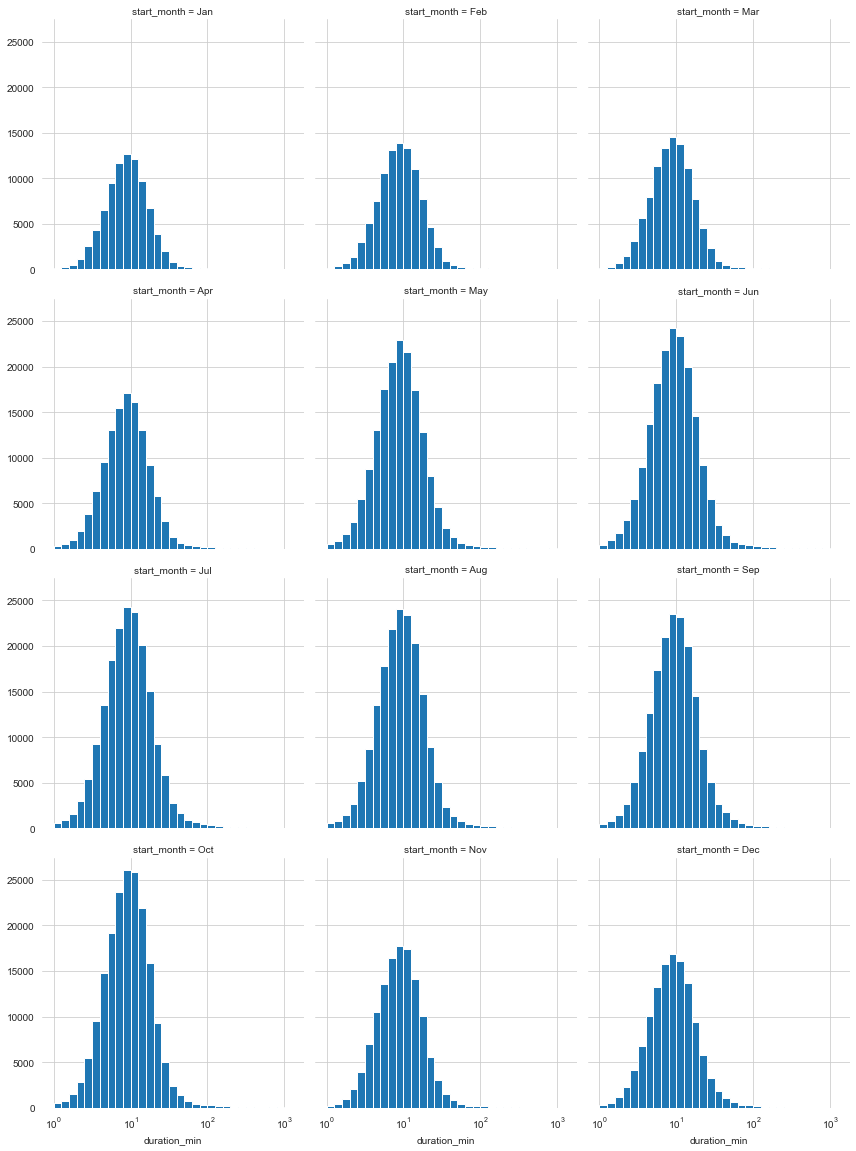

In [46]:
g = sb.FacetGrid(data = df, col = 'start_month', col_wrap=3, height=4, aspect=1)
bins = 10** log_bin_edges
g.map(plt.hist, "duration_min", bins = bins)
plt.xscale('log');

#### Observation:
From another dimension (month), I observe that the peaking months are (again) October followed by 3rd quarter.

_______________

### Duration mean by age

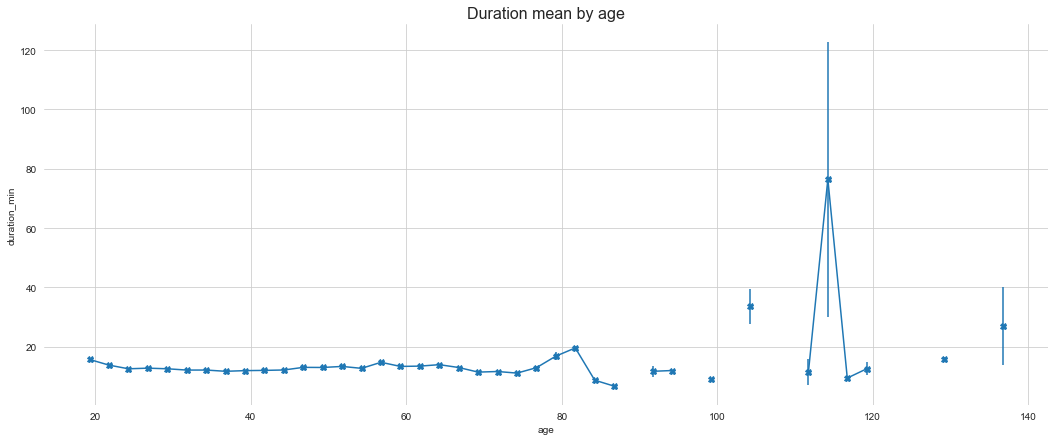

In [47]:
# set bin edges, compute centers
bin_size = 2.5
xbin_edges = np.arange(0.5, df['age'].max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]

# compute statistics in each bin
data_xbins = pd.cut(df['age'], xbin_edges, right = False, include_lowest = True)
y_means = df['duration_min'].groupby(data_xbins).mean()
y_sems = df['duration_min'].groupby(data_xbins).sem()

# plot the summarized data
plt.figure(figsize=(18,7))
plt.errorbar(x = xbin_centers, y = y_means, yerr = y_sems, marker='X')
plt.xlabel('age')
plt.ylabel('duration_min')
plt.title('Duration mean by age', size = 16);

#### Observation:
Here I observe the moving duration average along the x-axis of different ages with lines of unbaised standard errors. I noticed that this average experiences ups and downs peaks above the age of 100.

_______________

### Mean duration_min by start_day

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


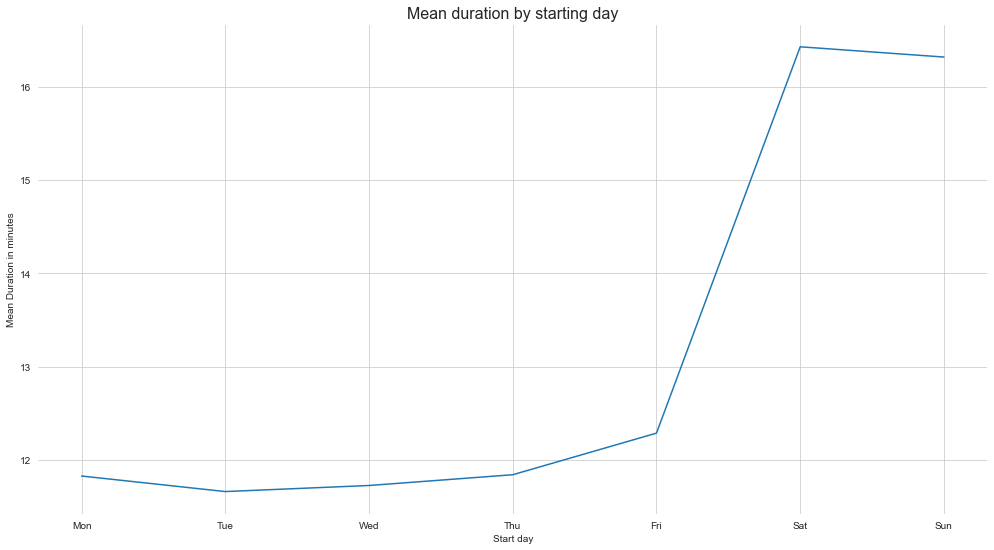

In [48]:
df[['duration_min','start_day']].groupby(by='start_day').mean()\
.plot(style='-', legend=False, figsize=(17,9))

plt.xlabel('Start day')
plt.ylabel('Mean Duration in minutes')
plt.title('Mean duration by starting day', size = 16);

#### Observation:
Here I observe a steadily increasing duration mean and sudden jump after Friday which is the weekend.

_______________

### User type counts by time of day

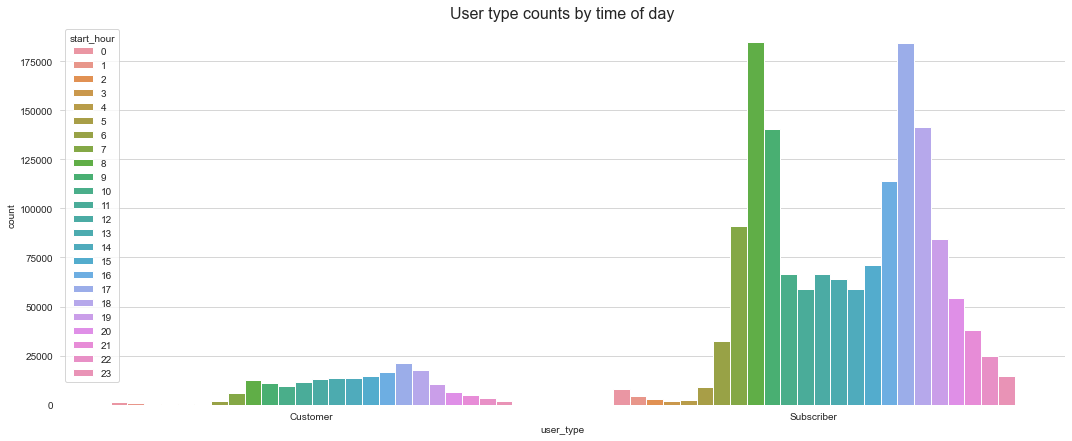

In [49]:
plt.figure(figsize=(18,7))
sb.countplot(data = df, x = 'user_type', hue = 'start_hour')
plt.title('User type counts by time of day', size = 16);

#### Observation:
Here we dive in the behavoir of hourly use counts but this time considering the user type. The subscribers are the most frequent bike users overall.

_______________

### User type counts by weekday

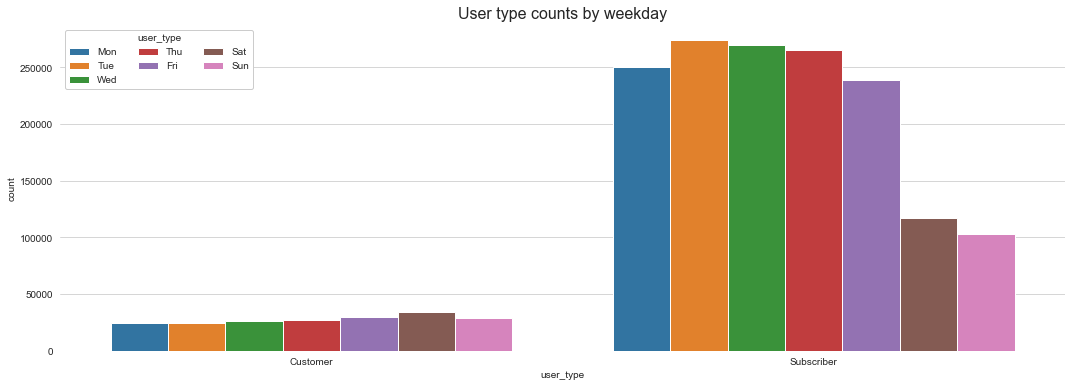

In [50]:
plt.figure(figsize=(18,6))
ax = sb.countplot(data = df, x = 'user_type', hue = 'start_day', hue_order=weekdays)
ax.legend(loc = 'best', ncol = 3, framealpha = 1, title = 'user_type')
plt.title('User type counts by weekday', size = 16)

plt.show()

#### Observation:
Another look at the use count behavior of both customer and subscriber along the weekdays. We notice a drop on the weekends for the subscribers while the trend in customers is more steady although smaller.

_______________

### User type counts by month

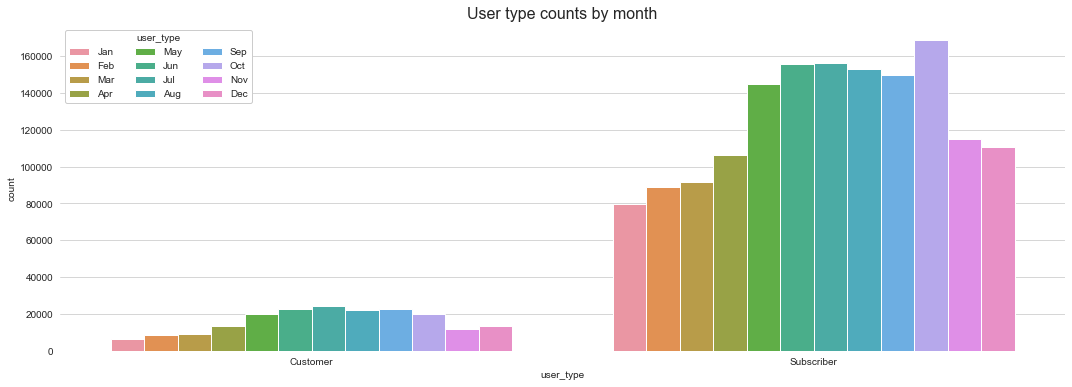

In [51]:
plt.figure(figsize=(18,6))
ax = sb.countplot(data = df, x = 'user_type', hue = 'start_month', hue_order=months)
ax.legend(loc = 'best', ncol = 3, framealpha = 1, title = 'user_type')
plt.title('User type counts by month', size = 16)
plt.show()

#### Observation:
The seasonality of bikers, both customers and subscribers, are normally changing over the course of a year. This trend is more obvious with subscribers.

_______________

### Duration distribution by user type

Text(0.5, 1.0, 'Duration distribution by user type')

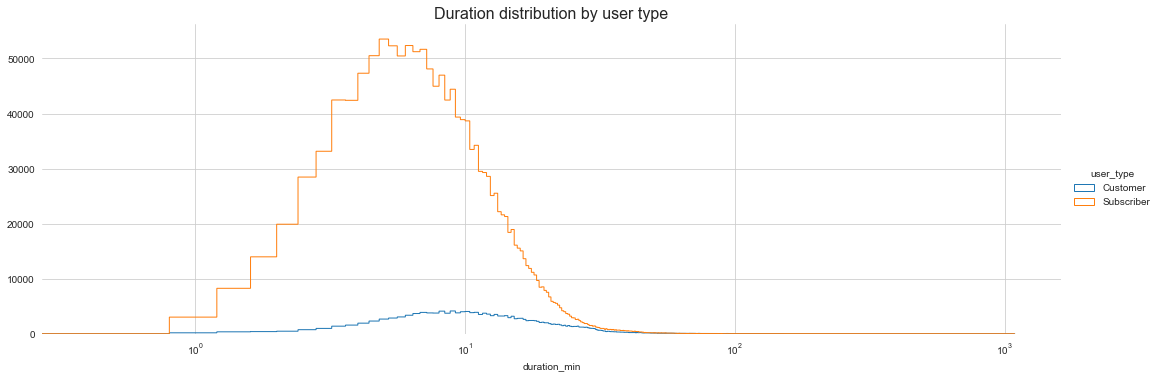

In [52]:
data = df.duration_min
bin_edges = np.arange(0, data.max()+0.4, 0.4)

g = sb.FacetGrid(data = df, hue = 'user_type', height = 5, aspect=3)
g.map(plt.hist, "duration_min", bins = bin_edges, histtype = 'step')
g.add_legend()
plt.xscale('log')
plt.title('Duration distribution by user type', size = 16)

#### Observation:
This graph shows the distribution of different mean durations for both customers and subscribers with a dominating curve for subscribers.

_______________

_______________

## IV. Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Duration vs. Age by user type

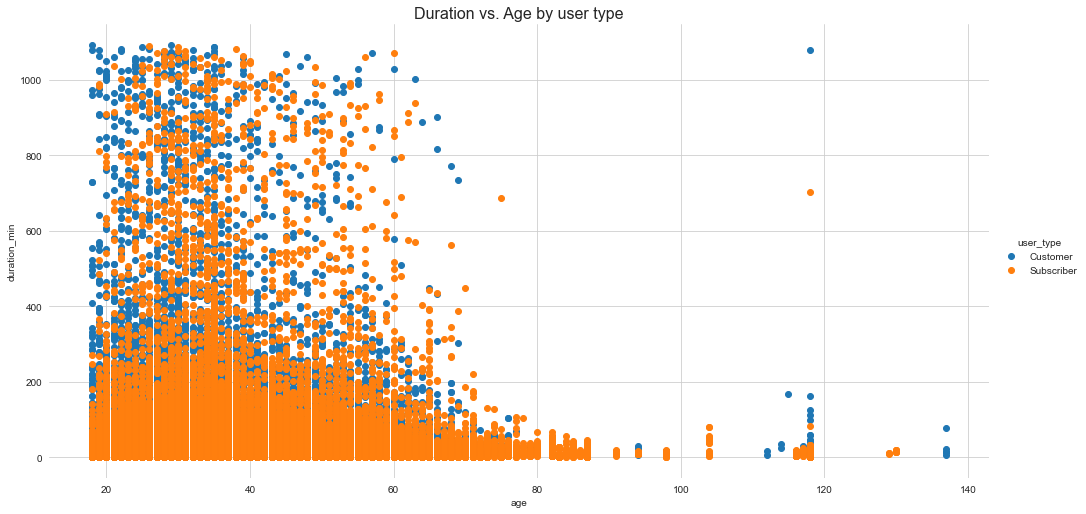

In [53]:
g = sb.FacetGrid(data = df, hue = 'user_type', height = 7,aspect= 2)
g.map(plt.scatter, 'age', 'duration_min')
plt.title('Duration vs. Age by user type', size = 16)
g.add_legend();

#### Observation:
Here I observe that the high density of usage per age of both user types are below 150 minutes and below 50 years old.

_______________

### Duration vs. Age by gender

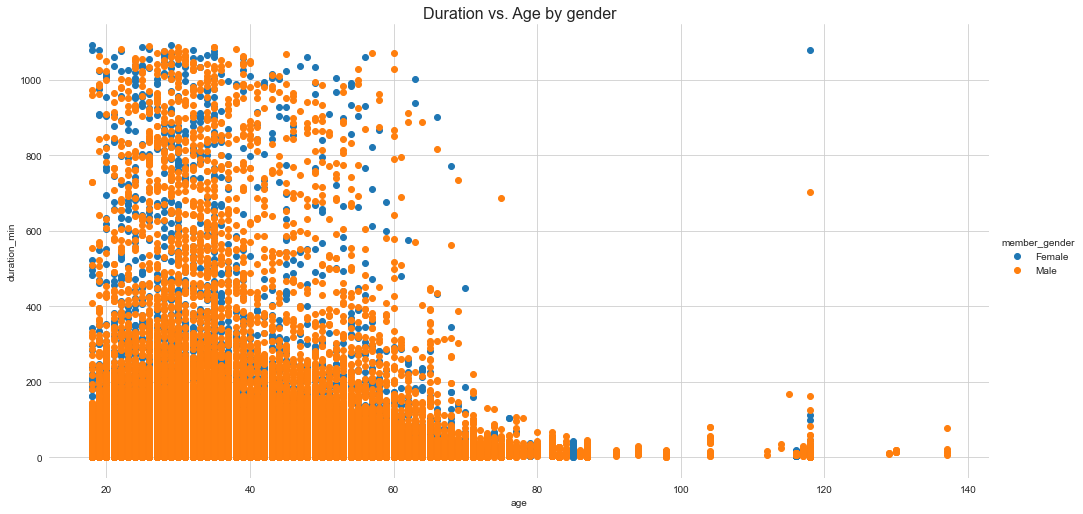

In [54]:
g = sb.FacetGrid(data = df, hue = 'member_gender', height = 7,aspect= 2)
g.map(plt.scatter, 'age', 'duration_min')
plt.title('Duration vs. Age by gender', size = 16)
g.add_legend();

#### Observation:
Similarly, I observe that the high density of usage per age of both genders are below 150 minutes and below 50 years old.

_______________

### Duration by user type per gender

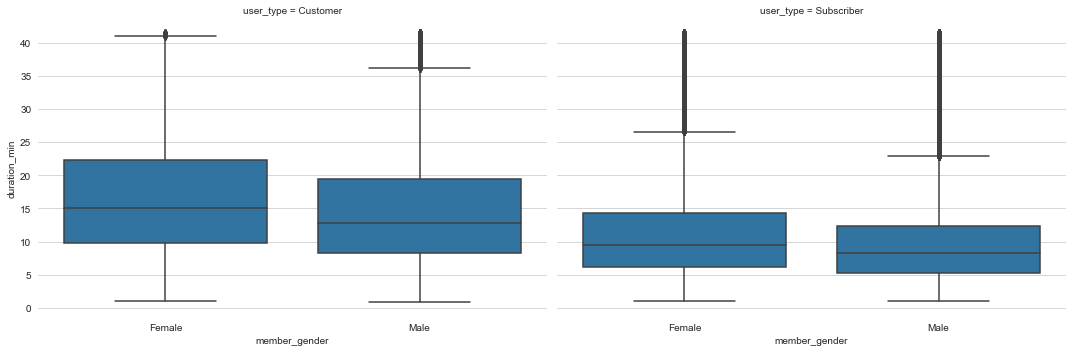

In [55]:
# again I filtered duration to minimize data noise due to many outliers 
# I limited the data by 98% percentile of duration
g = sb.FacetGrid(data = df[df['duration_min'] <= 41.5], col = 'user_type', height = 5, aspect=1.5)
g.map(sb.boxplot, 'member_gender', 'duration_min', order = ['Female','Male']);

#### Observation:
* In general, I observe that customers tends to use the bikes for longer periods.
* Also, I observe that females have slightly higher records of duration for both user types.

_______________

### Age by gender per user type

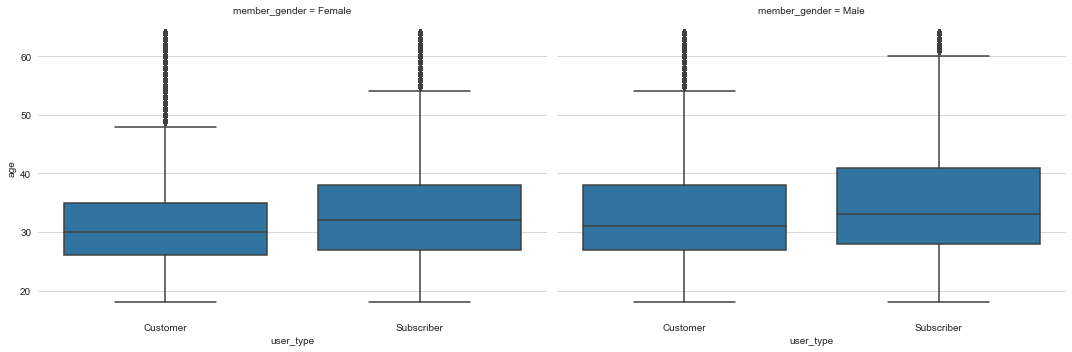

In [56]:
# filtered age to minimize data noise due to many outliers 
g = sb.FacetGrid(data = df[df['age'] < 65], col = 'member_gender', height = 5, aspect=1.5)
g.map(sb.boxplot, 'user_type', 'age', order = ['Customer','Subscriber']);

#### Observation:
* On the other hand, males age tends to be higher than female genders.
* Also, the age of subscribers tends to be slighly higher regardless of gender.

_______________

### Duration vs. age by user type

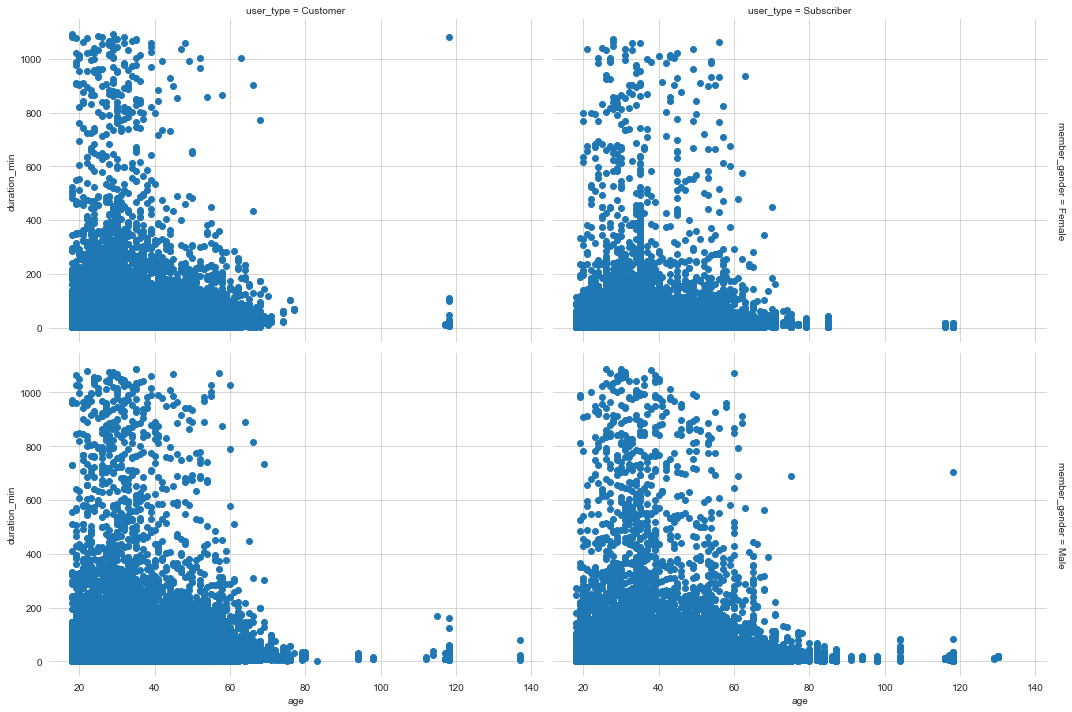

In [57]:
g = sb.FacetGrid(data = df, col = 'user_type', row = 'member_gender', 
                 height = 5, aspect= 1.5, margin_titles = True)
g.map(plt.scatter, 'age', 'duration_min');

#### Observation:
Here I observe that younger customers tends to use bikes for longer periods.

_______________

### Heatmap of mean duration by gender vs. user type

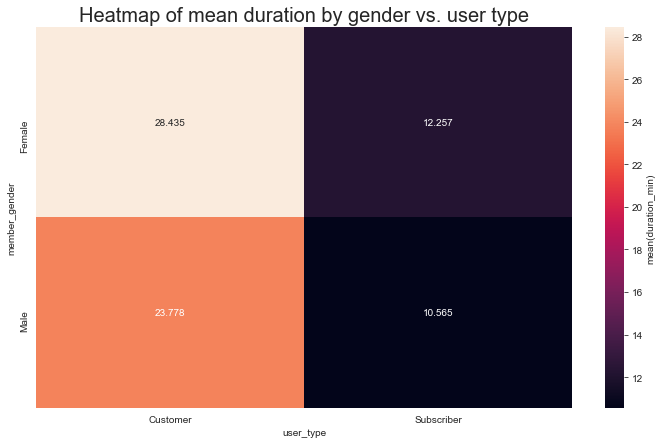

In [58]:
cat_means = df.groupby(['user_type', 'member_gender']).mean()['duration_min']
cat_means = cat_means.reset_index(name = 'duration_min_avg')
cat_means = cat_means.pivot(index = 'member_gender', columns = 'user_type',
                            values = 'duration_min_avg')
plt.figure(figsize=(12,7))
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(duration_min)'});

plt.title('Heatmap of mean duration by gender vs. user type', size = 20);

#### Observation:
This heatmap tells a main story which is: 
* customer females have the highest mean duration. Probably it's a good idea to attract this class of customers.
* subscriber males have the lowest mean duration.

_______________

### Duration vs. user type per gender

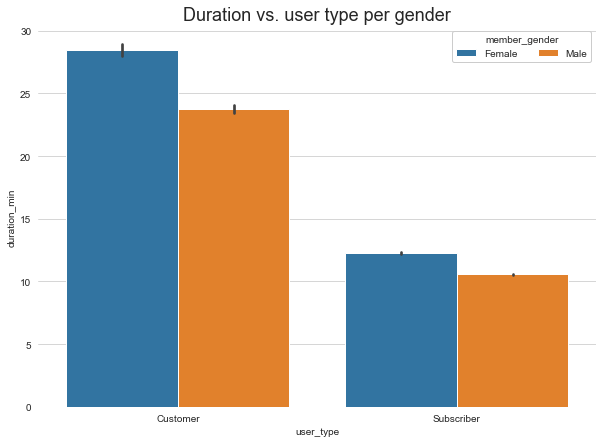

In [59]:
plt.figure(figsize=(10,7))
ax = sb.barplot(data = df, x = 'user_type', y = 'duration_min', hue = 'member_gender')
ax.legend(loc = 'best', ncol = 3, framealpha = 1, title = 'member_gender');

plt.title('Duration vs. user type per gender',size=18);

In [60]:
df[['user_type','member_gender','duration_min']].groupby(by=['user_type','member_gender']).mean()

duration_min
user_type  member_gender              
Customer   Female                28.43
           Male                  23.78
Subscriber Female                12.26
           Male                  10.57

#### Observation:
This visualisation tells the same story as the heatmap that the female customers have the highest mean duration.

_______________

### Mean duration by user type and gender

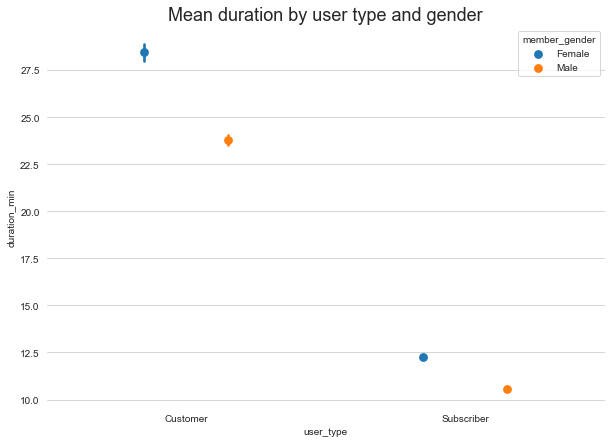

In [61]:
plt.figure(figsize=(10,7))
ax = sb.pointplot(data = df, x = 'user_type', y = 'duration_min', hue = 'member_gender',
                  dodge = 0.3, linestyles = "");

plt.title('Mean duration by user type and gender',size=18);

#### Observation:
Again, with enhance date-to-ink ratio, we demonstrate that female customers have the highest mean duration.

_______________

### Mean duration vs. age per user type

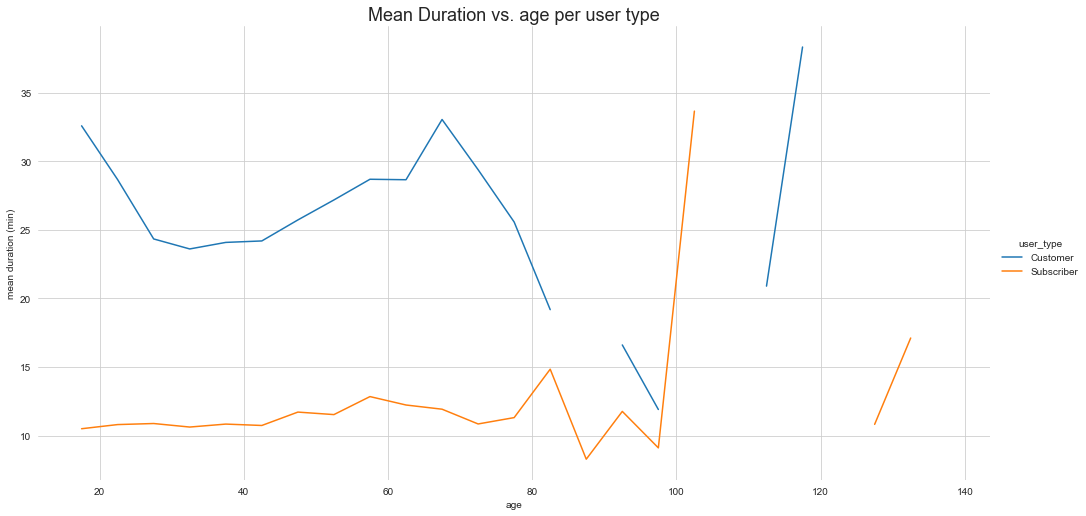

In [62]:
def mean_poly(x, y, bins = 10, **kwargs):
    """ Custom adapted line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    means = y.groupby(data_bins).mean()

    # create plot
    plt.errorbar(x = bin_centers, y = means, **kwargs)

bin_edges = np.arange(0, df['age'].max()+5, 5)
g = sb.FacetGrid(data = df, hue = 'user_type', height = 7, aspect=2)
g.map(mean_poly, "age", "duration_min", bins = bin_edges)
g.set_ylabels('mean duration (min)')
g.add_legend();

plt.title('Mean Duration vs. age per user type',size=18);

#### Observation:
Here I observe mean duration of both user types along the x-axis of age. I observe sharp trends due to lack of sufficient data or users for ages above 65 (counts for less than 1%).

_______________

### Mean duration vs. age per gender

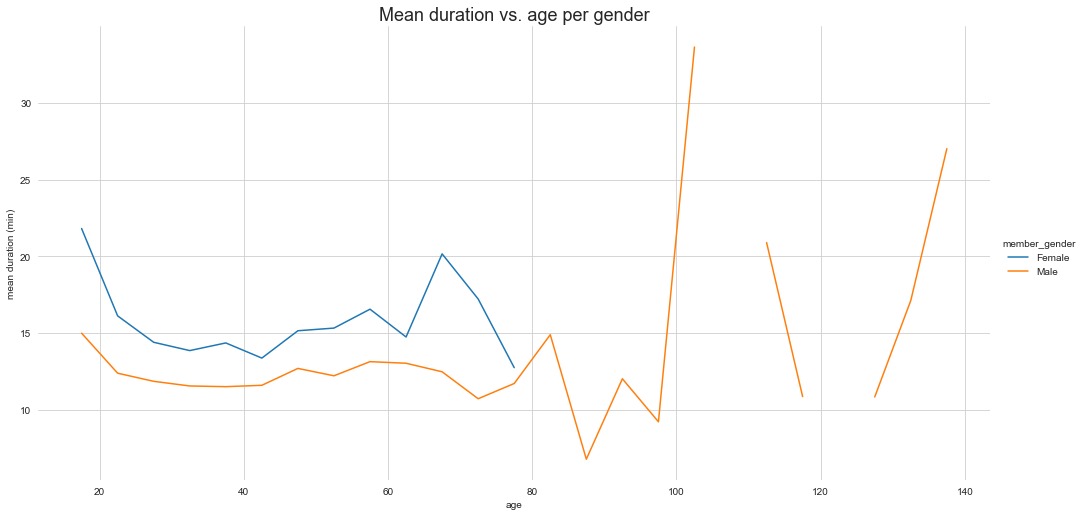

In [63]:
def mean_poly(x, y, bins = 10, **kwargs):
    """ Custom adapted line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    means = y.groupby(data_bins).mean()

    # create plot
    plt.errorbar(x = bin_centers, y = means, **kwargs)

bin_edges = np.arange(0, df['age'].max()+5, 5)
g = sb.FacetGrid(data = df, hue = 'member_gender', height = 7, aspect=2)
g.map(mean_poly, "age", "duration_min", bins = bin_edges)
g.set_ylabels('mean duration (min)')
g.add_legend();
plt.title('Mean duration vs. age per gender',size=18);

#### Observation:
Here I observe that a steady mean duration before 60 years of age for different genders (again) due to the lack of enough data points for higher ages.